###### Data Description :
    
    The task is to predict the quality of the wine using the Input Variables
    

In [3]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
wine=pd.read_csv("WineQuality-Red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


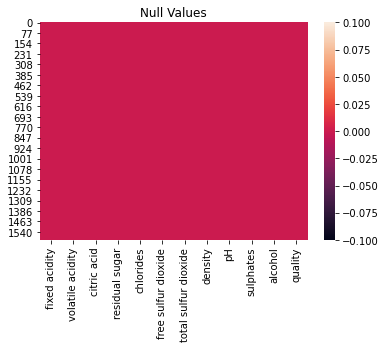

In [8]:
sns.heatmap(wine.isnull())
plt.title("Null Values")
plt.show()

By Observing the above heatmap we can see that there is no Null values in the data set

In [9]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:xlabel='quality', ylabel='count'>

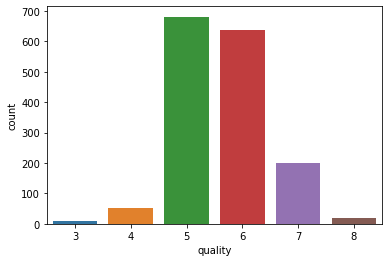

In [11]:
sns.countplot(x="quality", data=wine)

In [12]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
cor_mat=wine.corr()
cor_mat["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

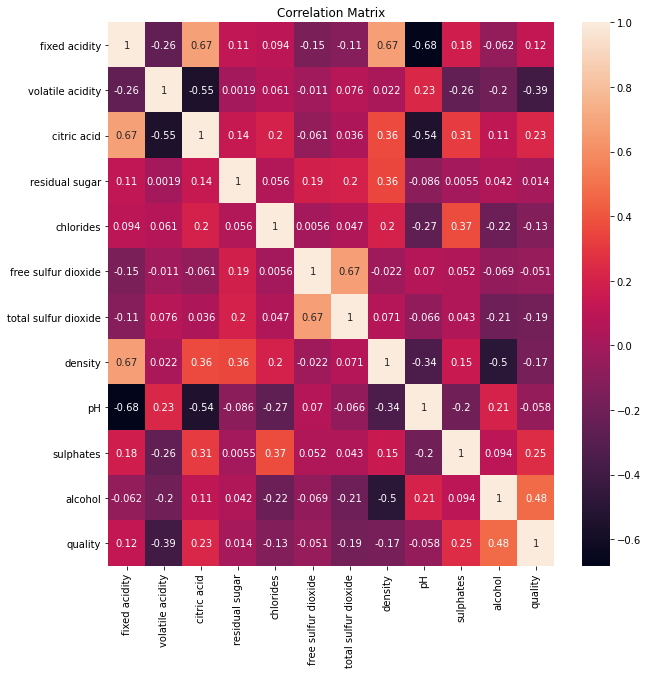

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

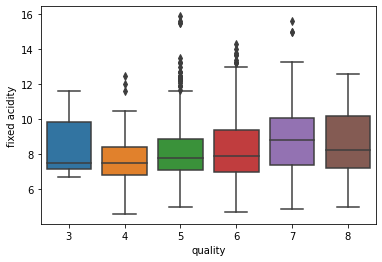

In [15]:
sns.boxplot("quality","fixed acidity", data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

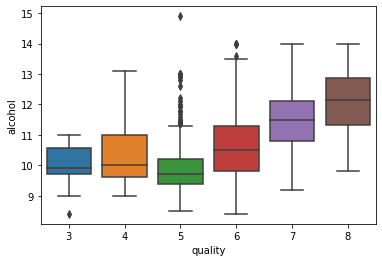

In [16]:
sns.boxplot("quality","alcohol",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

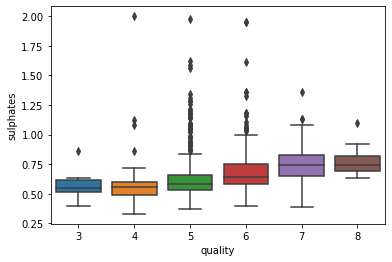

In [17]:
sns.boxplot("quality","sulphates",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

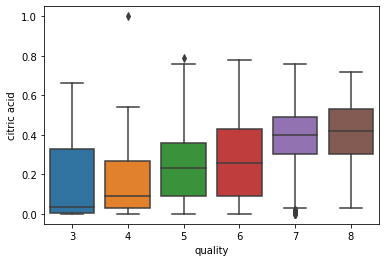

In [18]:
sns.boxplot("quality","citric acid",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

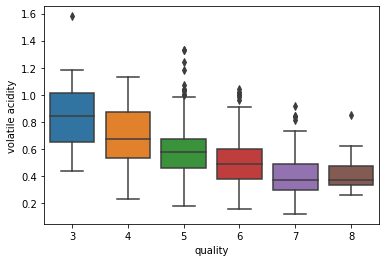

In [19]:
sns.boxplot("quality","volatile acidity",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

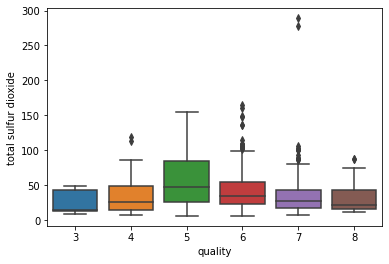

In [20]:
sns.boxplot("quality","total sulfur dioxide",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='density'>

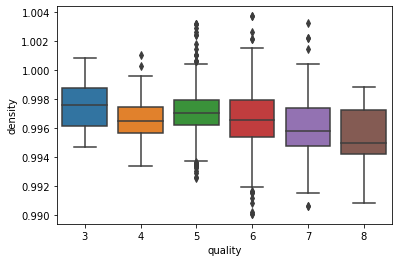

In [21]:
sns.boxplot("quality","density",data=wine)

C:\INSAID-Preethi-05Oct\PythonAnaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

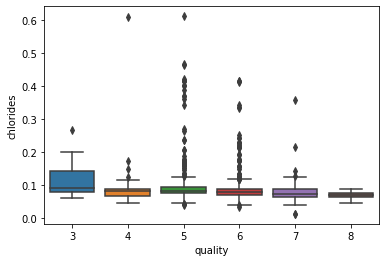

In [22]:
sns.boxplot("quality","chlorides",data=wine)

We can see there are outliers for most of the columns.

Now Lets create a new column "Wine_Quality". this column will contain the values of 0 and 1. 1 for Good and 0 for Bad quality

In [23]:
wine_quality=[]

for i in wine["quality"]:
    if i >= 7 and i<=10:
        wine_quality.append('1')
    elif i>=1 and i<=6:
        wine_quality.append('0')
wine["wine_quality"] = wine_quality

In [24]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality'],
      dtype='object')

In [25]:
wine['wine_quality'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: wine_quality, dtype: object

Now Lets split the data into x and y

In [26]:
x=wine.iloc[:,:11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
y=wine["wine_quality"]
y.head(8)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
Name: wine_quality, dtype: object

Lets scale the data to bring all the data to similar standard using standard scalar

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [29]:
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [30]:
#Now lets split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [31]:
x_train.shape

(1279, 11)

In [32]:
x_test.shape

(320, 11)

In [33]:
y_train.shape

(1279,)

In [34]:
y_test.shape

(320,)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

dtc=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
gnb=GaussianNB()
svc=SVC()
rfc=RandomForestClassifier()

model=[dtc,lr,knn,gnb,svc,rfc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is :',acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')   
    

Accuracy Score of DecisionTreeClassifier() is : 0.88125
[[260  21]
 [ 17  22]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       281
           1       0.51      0.56      0.54        39

    accuracy                           0.88       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.89      0.88      0.88       320



Accuracy Score of LogisticRegression() is : 0.878125
[[272   9]
 [ 30   9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       281
           1       0.50      0.23      0.32        39

    accuracy                           0.88       320
   macro avg       0.70      0.60      0.62       320
weighted avg       0.85      0.88      0.86       320



Accuracy Score of KNeighborsClassifier() is : 0.890625
[[272   9]
 [ 26  13]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       281


Cross Validation : 
    
    

In [36]:
dtc_score=cross_val_score(dtc, x,y,cv=10)
lr_score=cross_val_score(lr, x,y,cv=10)
knn_score=cross_val_score(knn, x,y,cv=10)
gnb_score=cross_val_score(gnb, x,y,cv=10)
svc_score=cross_val_score(svc, x,y,cv=10)
rfc_score=cross_val_score(rfc, x,y,cv=10)

cross_val_model=[dtc_score,lr_score,knn_score,gnb_score,svc_score,rfc_score]

for i in cross_val_model:
    print("Accuracy Score of is : ",i.mean())
    print(i)
    print("Mean Score : ",i.mean())
    print("Standard Deviation : ", i.std())
    print('\n')

Accuracy Score of is :  0.8248702830188679
[0.88125    0.8125     0.79375    0.84375    0.88125    0.8
 0.7875     0.85       0.80625    0.79245283]
Mean Score :  0.8248702830188679
Standard Deviation :  0.03446659614434677


Accuracy Score of is :  0.8743042452830189
[0.85       0.8875     0.8625     0.88125    0.875      0.91875
 0.825      0.875      0.88125    0.88679245]
Mean Score :  0.8743042452830189
Standard Deviation :  0.023587939073794063


Accuracy Score of is :  0.8511595911949685
[0.85625    0.88125    0.84375    0.825      0.89375    0.8875
 0.81875    0.80625    0.84375    0.85534591]
Mean Score :  0.8511595911949685
Standard Deviation :  0.02818655664883404


Accuracy Score of is :  0.8274213836477987
[0.88125    0.89375    0.75       0.775      0.9        0.8875
 0.66875    0.74375    0.9        0.87421384]
Mean Score :  0.8274213836477987
Standard Deviation :  0.08034355650155389


Accuracy Score of is :  0.8805542452830188
[0.875      0.8875     0.85       0.875   

We can see that SVC has more accuracy score 88% as compared other algorithms.

Hyper Parameter Tuning :

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
             'max_depth':np.arange(2,20)}
GCV=GridSearchCV(rfc, param_grid, cv=10)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 14}

In [40]:
GCV.best_estimator_

RandomForestClassifier()

In [44]:
GCV_pred=GCV.predict(x_test)
print(GCV_pred)

['0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

In [45]:
print(accuracy_score(y_test,GCV_pred))

0.928125


Saving the Model :
    

In [47]:
import joblib
joblib.dump(GCV.best_estimator_,"RedWineQuality.obj")

['RedWineQuality.obj']